### Import the needed package

In [ ]:
# package for handling the custom scripts
import sys
# add path to utilities directory
sys.path.insert(0, "./../../utilities")

# package for handling the file and directory
import os
# package for handling the environment variables
from dotenv import load_dotenv
# package for handling the random number
from random import randint
# package for handling the visualization
import matplotlib.pyplot as plt
# the custom package for handling the data
import utilities as utils
# package for handling paths
import paths

# load the environment variables
load_dotenv()

True

### Create the destination directory

In [ ]:
try:
    os.mkdir(paths.path_clean_aug)
except FileExistsError:
    print("folder already exists")

### Get all the files

In [ ]:
images = os.listdir(paths.path_clean_fundus)
masks = os.listdir(paths.path_clean_mask)

### Visualize the clahe image

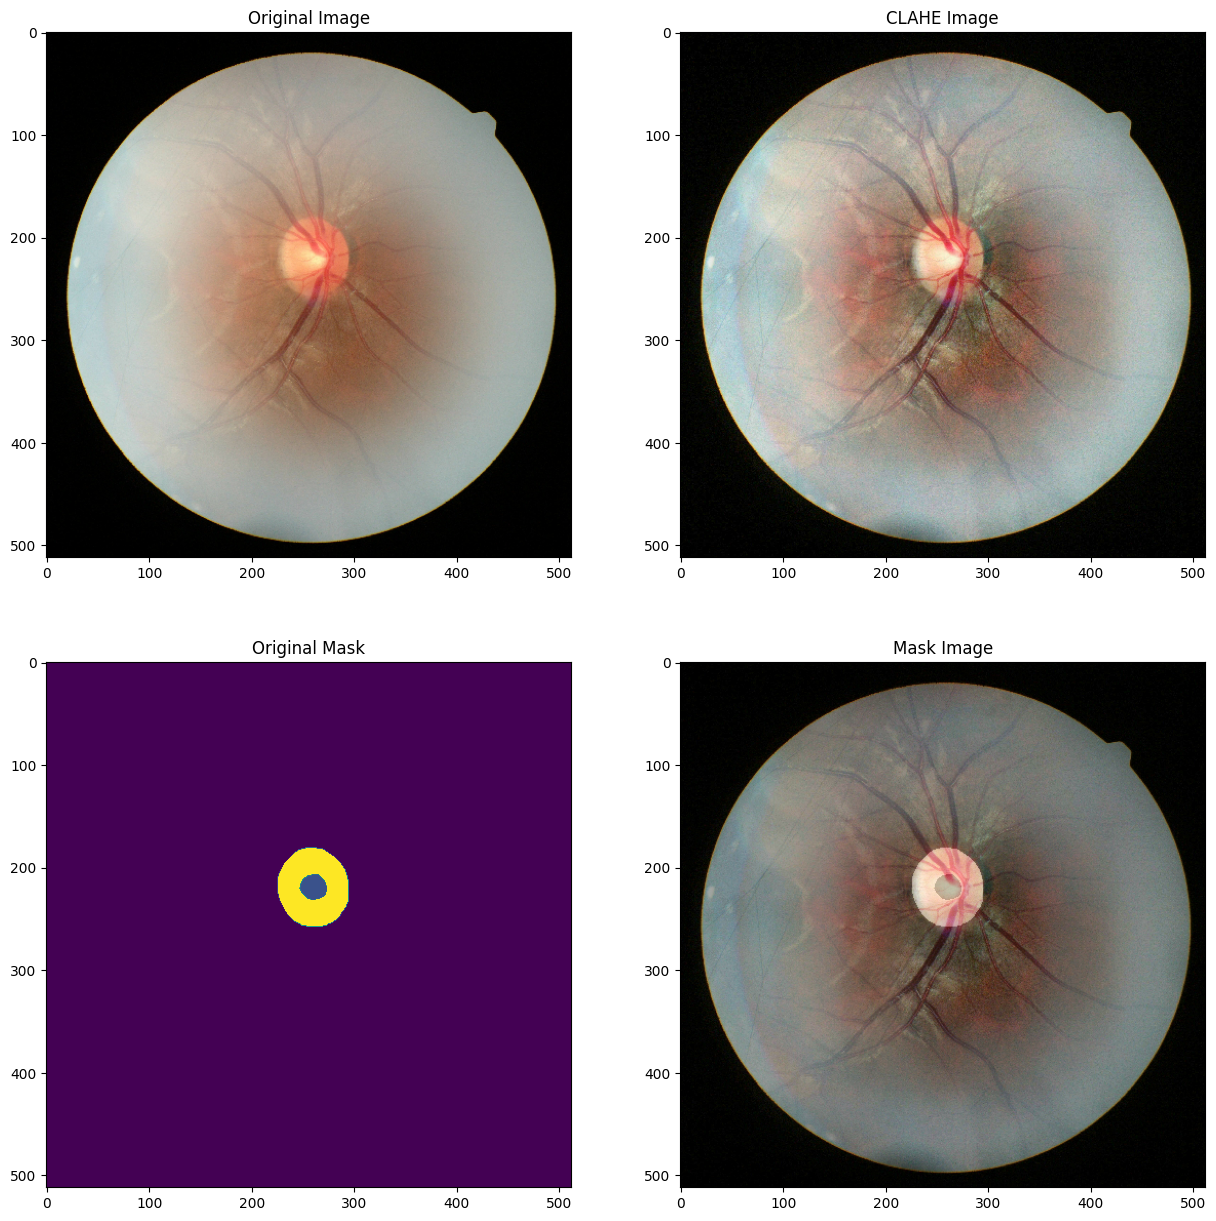

In [ ]:
# main variables
clip_limit = 2.
rand_index = randint(0, len(images) - 1)
# Get the sample image and mask
sample_img = utils.get_file(images[rand_index], paths.path_clean_fundus, "image")
sample_mask = utils.get_file(masks[rand_index], paths.path_clean_mask, "mask")
# implement the CLAHE
clahe_image = utils.augment_clahe(sample_img, clip_limit)

# Plot the image and mask
plt.figure(figsize=(15, 15))

for index, (picture, title) in enumerate(zip([sample_img, clahe_image, sample_mask],
                                            ["Original Image", "CLAHE Image", "Original Mask"])):
    plt.subplot(2, 2, index + 1)
    plt.imshow(picture)
    plt.title(title)

# Visualize the mask image
plt.subplot(2, 2, 4)
plt.imshow(clahe_image)
plt.imshow(sample_mask, cmap="gray", alpha=0.3)
plt.title("Mask Image")

plt.show()

### Create the augmentation images

In [ ]:
utils.create_aug_img(images, paths.path_clean_fundus, paths.path_clean_aug, clip_limit)